In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd



In [11]:
male = {}
df = pd.read_json("male_metadata.json")
df
df['recording_type'].unique()
# for col in df:
    # print(df[col].unique())

array(['u_n', 'i_l', 'i_lhl', 'i_h', 'a_l', 'u_h', 'u_l', 'a_lhl', 'a_h',
       'i_n', 'a_n', 'u_lhl'], dtype=object)

<AxesSubplot:ylabel='Frequency'>

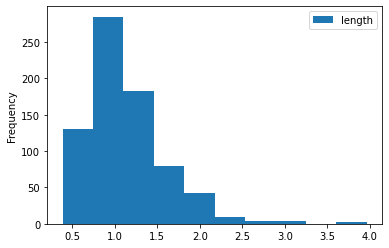

In [8]:
# df['bins']=pd.cut(df['length'],bins=[0,1,2,3,4,5], labels=["0<x<1","1<x<2","2<x<3","3<x<4","x>4"])
# df = df.groupby(['length', 'bins']).size().unstack(fill_value=0)

df[df['recording_type'].str.contains('u_lhl')].plot.hist(y='length')

In [ ]:
df.plot.pie(subplots=True,figsize=(8, 3))

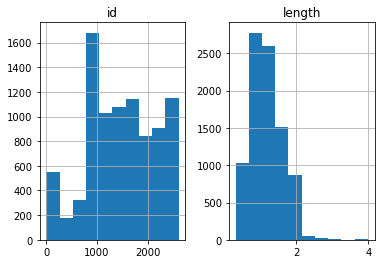

In [4]:
hist=df[.hist()

